In [1]:
import screed
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from mpltools import style
import mpld3
from mpld3 import plugins
import jinja2
#from mpld3._objects import D3Line2D, D3Collection
mpld3.disable_notebook()

In [2]:
style.use("ggplot")

In [3]:
%matplotlib inline

In [4]:
ir1 = "/var/seq_data/Chazy/SIP_bulk/2_250_Index1.fastq.gz"
ir2 = "/var/seq_data/Chazy/SIP_bulk/2_250_Index2.fastq.gz"

In [ ]:
screed.read_fastq_sequences(ir1)
screed.read_fastq_sequences(ir2)

In [44]:
ir1db = screed.ScreedDB(ir1)
ir2db = screed.ScreedDB(ir2)

In [45]:
df_map = pd.read_csv("data/Chazy_BulkSIP_mapping.txt", delimiter="\t", usecols=[0,1,2], names=["SampleID","i1","i2"])
df_map

,SampleID,i1,i2
0,Sample,i1_r,i2_f
1,12C.NTH.Day1.Rep2,cgagagtt,atcgtacg
2,12C.NTH.Day14.Rep4,cgagagtt,actatctg
3,13X.NTH.Day1.Rep2,cgagagtt,tagcgagt
4,13X.PTH.Day7.Rep4,cgagagtt,ctgcgtgt
5,12C.PTH.Day7.Rep4,cgagagtt,tcatcgag
6,13X.NTH.Day14.Rep2,cgagagtt,cgtgagtg
7,13X.PTH.Day14.Rep3,cgagagtt,ggatatct
8,13C.NTH.Day30.Rep4,cgagagtt,gacaccgt
9,12C.NTH.Day14.Rep1,gacatagt,atcgtacg


In [46]:
map_d = dict(map(lambda x: (x[0] + x[1], x[2]), zip(df_map.i1, df_map.i2, df_map.SampleID)))
print map_d.keys()[10], map_d[map_d.keys()[10]]

ctgcgtagactatctg 13X.PTH.Day1.Rep2


In [47]:
print map_d

{'tgagtacgactatctg': '13C.PTH.Day3.Rep3', 'tatagcgagacaccgt': '12C.NTH.Day7.Rep3', 'gtctatgactgcgtgt': '12C.PTH.Day1.Rep1', 'tagtctccggatatct': '12C.NTH.Day3.Rep1', 'tatagcgaactatctg': '13X.PTH.Day1.Rep4', 'actcactgggatatct': '12C.NTH.Day7.Rep2', 'tatagcgatcatcgag': '12C.PTH.Day14.Rep2', 'tagtctccatcgtacg': '12C.PTH.Day30.Rep2', 'acgctacttcatcgag': '12C.PTH.Day1.Rep4', 'acgctactctgcgtgt': '13X.NTH.Day3.Rep3', 'ctgcgtagactatctg': '13X.PTH.Day1.Rep2', 'actacgaccgtgagtg': '12C.NTH.Day7.Rep1', 'gtctatgacgtgagtg': '13C.PTH.Day7.Rep3', 'actcactgtagcgagt': '13C.NTH.Day30.Rep2', 'ctgcgtaggacaccgt': '12C.NTH.Day3.Rep2', 'gacatagtatcgtacg': '12C.NTH.Day14.Rep1', 'actcactgcgtgagtg': '12C.PTH.Day7.Rep2', 'ctgcgtagtcatcgag': '13C.PTH.Day30.Rep4', 'tatagcgacgtgagtg': '13C.PTH.Day3.Rep4', 'tagtctccactatctg': '13X.PTH.Day7.Rep1', 'gtctgctagacaccgt': '12C.PTH.Day3.Rep2', 'acgctactgacaccgt': '13C.NTH.Day30.Rep1', 'actcactgctgcgtgt': '13C.NTH.Day3.Rep4', 'cgagagtttcgacgag': '13C.NTH.Day7.Rep1', 'actcactg

In [35]:
screed.read_fastq_sequences("/var/seq_data/Chazy/SIP_bulk/2_250_bulk_pear_merged_raw-2015-03-16.assembled.fastq")

<ScreedDB, '/var/seq_data/Chazy/SIP_bulk/ChazySIP_bulk_pear_merged_raw-2015-03-02.assembled.fastq_screed'>

In [48]:
db = screed.ScreedDB("/var/seq_data/Chazy/SIP_bulk/2_250_bulk_pear_merged_raw-2015-03-16.assembled.fastq_screed")

In [49]:
counter = 0
unassigned = 0
cnt = Counter()
fn = "/var/seq_data/Chazy/SIP_bulk/2_250_bulk_pear_merged_raw-2015-03-16.assembled.dmult.fastq"
with open(fn, "w") as out:
    for rec in db.itervalues():
        index_concat = ir1db[rec["name"]]["sequence"] + ir2db[rec["name"]]["sequence"]
        try:
            new_name = map_d[index_concat.lower()] + "_" + str(counter) #case sensitive
        except KeyError:
            unassigned += 1
            continue
        counter += 1
        cnt[map_d[index_concat.lower()]] += 1 #case sensitive
        s, q = rec["sequence"], rec["accuracy"]
        out.write("@%s orig_name=%s\n%s\n+\n%s\n"%(new_name,rec["name"],s,q))
print "Unable to assign %s reads to samples"%unassigned

Unable to assign 2526130 reads to samples


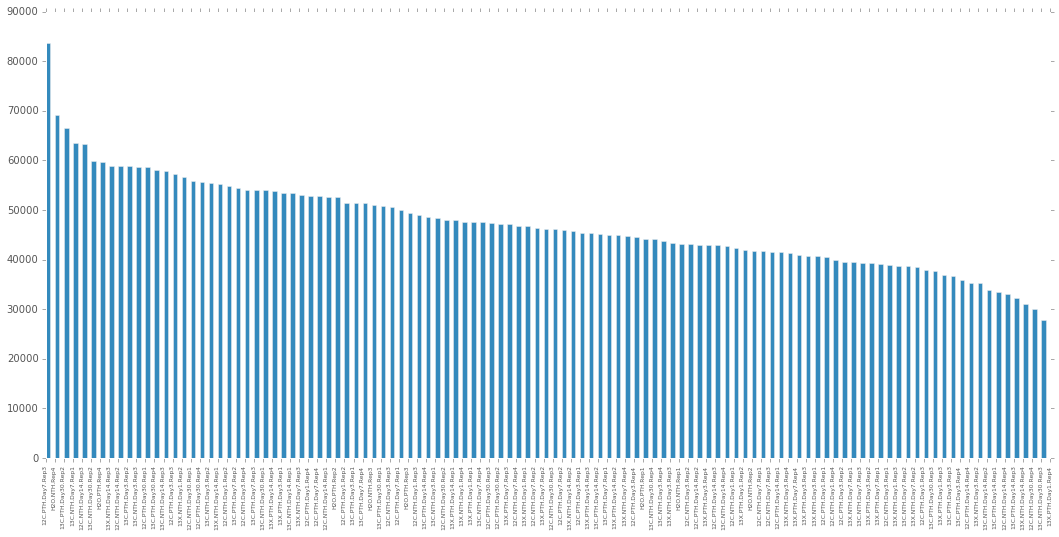

In [50]:
X = np.arange(len(cnt.keys()))
Y = [v for k, v in cnt.most_common()]
fig = plt.figure()
fig.set_size_inches((18,8))
ax = fig.add_subplot(111)
bars = ax.bar(X, Y, width=0.50)
xlims = ax.set_xlim((X.min(), X.max()))
xt = ax.set_xticks(X)
xtl = ax.set_xticklabels([k for k, v in cnt.most_common()], rotation=90, ha="center", size=6)